# CS 210 GROUP PROJECT


In [180]:
>>> import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import reverse_geocoder as rg
from collections import OrderedDict
import seaborn as sns # a visualization library from matplotlib
import math
import json
import pprint
import datetime


In [181]:
walmart_features = pd.read_csv("/Users/artun/Downloads/walmart/features.csv")
walmart_train = pd.read_csv("/Users/artun/Downloads/walmart/train.csv")
walmart_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [182]:
walmart_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [183]:
walmart_features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [184]:
walmart_train.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [185]:
walmart_features.dtypes

Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
dtype: object

In [186]:
walmart_train.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object

## How sales change as year changes

In [187]:
walmart_train['Date'] = pd.to_datetime(walmart_train['Date'])
walmart_train['Year'], walmart_train['Month'] = walmart_train['Date'].dt.year, walmart_train['Date'].dt.month
walmart_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Year,Month
0,1,1,2010-02-05,24924.50,False,2010,2
1,1,1,2010-02-12,46039.49,True,2010,2
2,1,1,2010-02-19,41595.55,False,2010,2
3,1,1,2010-02-26,19403.54,False,2010,2
4,1,1,2010-03-05,21827.90,False,2010,3


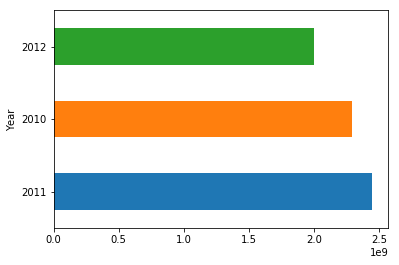

In [188]:
#Generate at least two histograms and two scatterplots from your data to describe the data set.

Year_sales = walmart_train.groupby(walmart_train["Year"]).sum()["Weekly_Sales"].sort_values(ascending=False)
Year_sales.plot(kind = "barh")

## How total number of sales varies in weekdays and holidays

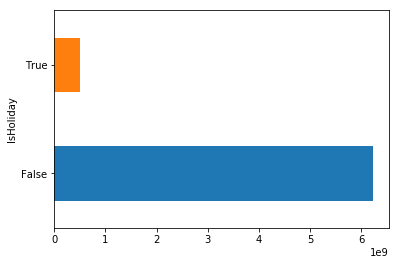

In [189]:
cols2plot = walmart_train.groupby(walmart_train["IsHoliday"]).sum()["Weekly_Sales"].sort_values(ascending=False)
cols2plot.plot(kind = "barh")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


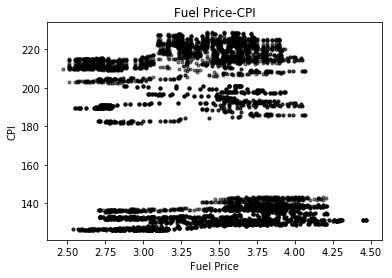

In [190]:
#A scatter plot is a graph used to determine whether there is a relationship between paired data
#Now we will check whether there are any relationship between fuel price and cpi

fuel_price = walmart_features['Fuel_Price']
consumer_price_index = walmart_features['CPI']

colors = (0,0,0)
area = np.pi*3
 
# Plot
plt.scatter(fuel_price,consumer_price_index, s=area, c=colors, alpha=0.5)
plt.title('Fuel Price-CPI')
plt.xlabel('Fuel Price')
plt.ylabel('CPI')
plt.show()


We can conclude from here that fuel price and CPI isn't strongly correlated 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


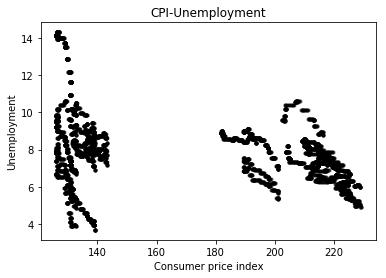

In [191]:
#Now we will check whether there are any relationship between unemployment and consumer price index
CPI = walmart_features['CPI']
unemployment = walmart_features['Unemployment']

colors = (0,0,0)
area = np.pi*3

# Plot
plt.scatter(CPI,unemployment, s=area, c=colors, alpha=0.5)
plt.title('CPI-Unemployment')
plt.xlabel('Consumer price index')
plt.ylabel('Unemployment')
plt.show()



It can be concluded that Consumer Price Index and Unemployment in Walmart(in various states) isn't correlated

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


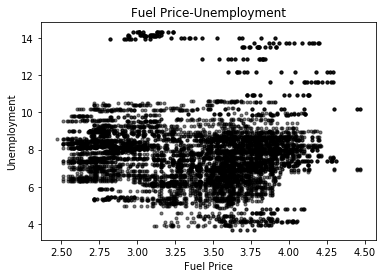

In [192]:
fuel_price = walmart_features['Fuel_Price']
unemployment = walmart_features['Unemployment']

colors = (0,0,0)
area = np.pi*3
 
# Plot
plt.scatter(fuel_price,unemployment, s=area, c=colors, alpha=0.5)
plt.title('Fuel Price-Unemployment')
plt.xlabel('Fuel Price')
plt.ylabel('Unemployment')
plt.show()

It is obvious that fuel price and unemployment in Walmart(in various states) isn't much correlated

In [193]:
walmart_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Year,Month
0,1,1,2010-02-05,24924.50,False,2010,2
1,1,1,2010-02-12,46039.49,True,2010,2
2,1,1,2010-02-19,41595.55,False,2010,2
3,1,1,2010-02-26,19403.54,False,2010,2
4,1,1,2010-03-05,21827.90,False,2010,3


### We want to store stores weekly sales for each week. We want to eliminate department from the walmart_train dataset.

In [194]:

columns = {'Store':[],'Date':[],'Weekly_Sales':[],'CPI':[]}
df =pd.DataFrame(columns)
mindate = min(walmart_train["Date"])
maxdate = max(walmart_train["Date"])
print(mindate)
print(maxdate)
#dates will be in this integer
#now we want to create a unique date list
unique_date = np.unique(walmart_train['Date'])
unique_store = np.unique(walmart_train['Store'])
copdata =walmart_train.groupby(['Date','Store']).sum() 
newdata = copdata.filter(items = ['Store','Date','Weekly_Sales'])
df = newdata
df['Date'] = datetime.datetime(2010,2,5)
df['CPI'] = 0.0
df.head()

counter = 0
for i in range(len(unique_date)):
    for s in range(45) :
        df['Date'][counter+s] = unique_date[i]
    counter = counter+45

2010-02-05 00:00:00
2012-10-26 00:00:00


In [195]:
walmart_features.head()
walmart_features.groupby(['Date'])
#df[(df['column_name'] >= A) & (df['column_name'] <= B)]
x = datetime.datetime(2012,10,26)
#print(x)
dates = pd.to_datetime(walmart_features['Date'])
copdates = dates.to_frame()
Dates = copdates[(copdates['Date']<=x)]
sync = walmart_features.filter(items = ['Date','CPI'])
df['Store'] = 0
counter = 0
for x in range(45) :
    x = 1
    for s in range(45):
        df['Store'][counter] = x
        x = x+1
        counter = counter + 1

In [196]:
df.head()

Weekly_Sales       Date  CPI  Store
Date       Store                                     
2010-02-05 1        1643690.90 2010-02-05  0.0      1
           2        2136989.46 2010-02-05  0.0      2
           3         461622.22 2010-02-05  0.0      3
           4        2135143.87 2010-02-05  0.0      4
           5         317173.10 2010-02-05  0.0      5

In [197]:
#I want to find the CPI corresponding for that date and store which means that there are 143*45 
#first of all I need to eliminate the cpis of which the date is greater than my maxdate then i can take the cpis consecutively

#so now the motivation is to eliminate the cpi
#so I can apply a fiter maybe then

walmart_features.filter(items =['Store','Date','CPI'])
#now i want to eliminate wrt to date
#df = df[df.score > 50]
walmart_features['Date'] = pd.to_datetime(walmart_features['Date'])
walmart_features = walmart_features[walmart_features['Date']<=maxdate]
walmart_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [198]:
df.head()

Weekly_Sales       Date  CPI  Store
Date       Store                                     
2010-02-05 1        1643690.90 2010-02-05  0.0      1
           2        2136989.46 2010-02-05  0.0      2
           3         461622.22 2010-02-05  0.0      3
           4        2135143.87 2010-02-05  0.0      4
           5         317173.10 2010-02-05  0.0      5

In [199]:
# Now the only problem is the sira of the two different dataframes
#in each iteration, i need to increase the
#for each date, I need to get the cpi s of the stores(in an increasing order)

walmart_features = walmart_features.reset_index(drop = True)

cnt = 0
for i in range(len(unique_date)):
    counter = 0
    for k in range(45):
        df['CPI'][k+cnt] = walmart_features['CPI'][i+counter]
        counter = counter + 143
    cnt = cnt + 45 
        
    

In [200]:
df.describe()

,Weekly_Sales,CPI,Store
count,6.435000e+03,6435.000000,6435.000000
mean,1.046965e+06,171.578394,7.237762
std,5.643666e+05,39.356712,12.930052
min,2.099863e+05,126.064000,0.000000
25%,5.533501e+05,131.735000,0.000000
50%,9.607460e+05,182.616521,0.000000
75%,1.420159e+06,212.743293,10.000000
max,3.818686e+06,227.232807,45.000000


## NOW WE ARE GOING TO PERFORM HYPOTESIS TESTING

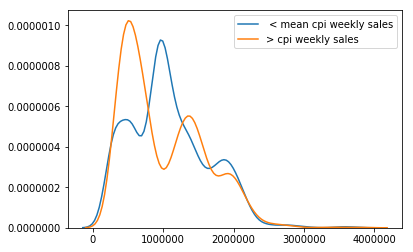

In [201]:
# cpi mean is 171
cpi_mean = 171.578

cop1_df = df[(df['CPI']<cpi_mean)]
cop2_df = df[(df['CPI']>=cpi_mean)]

ax = sns.kdeplot(cop1_df['Weekly_Sales'].rename(" < mean cpi weekly sales"))
sns.kdeplot(cop2_df['Weekly_Sales'].rename("> cpi weekly sales"))

plt.show()

In [202]:
from scipy import stats

In [203]:
#now extract p value
# extracting values
cop1_values = cop1_df["Weekly_Sales"].values
cop2_values = cop2_df["Weekly_Sales"].values

# two-sided test for the null hypothesis that 2 independent samples 
# have identical average (expected) values
_, p_value = stats.ttest_ind(a=cop1_values, b=cop2_values, equal_var=False)
p_value

5.391726118107853e-07

Since the p-value is below 0.05, we can reject the null hypothesis

In [204]:
walmart_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


# Linear Regression

We want to see how CPI and fuel price effects unemployment with this experiment

In [205]:
my_matrix = walmart_features[['CPI','Fuel_Price']].as_matrix() #.values can be used

In [206]:
#Now linear regression 
from sklearn.linear_model import LinearRegression
#fuel price and CPI is our two different datas
#i want to correlate more than two attributes 
fuel_array = walmart_features['Fuel_Price']
CPI_array = walmart_features['CPI']
# Showing our (X, y) pairs on the scatter plot
lol = list(zip(fuel_array,CPI_array))

In [207]:
#linear regression = The objective of a linear regression model is to find a relationship between one or more features
#(independent variables) and a continuous target variable(dependent variable). 
unemployment = walmart_features['Unemployment'].as_matrix()
unemployment = unemployment.reshape (-1,1)

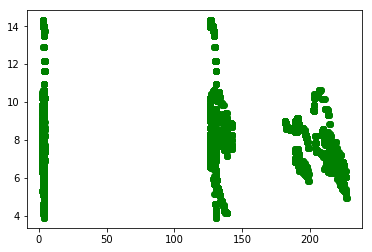

In [208]:
'''sales_array = df['Weekly_Sales'].as_matrix()
sales_array=sales_array.reshape(-1,1)
fuel_array = walmart_features['Fuel_Price'].as_matrix()
fuel_array = fuel_array.reshape(-1,1)
cpi_array = df['CPI'].as_matrix()
cpi_array=cpi_array.reshape(-1,1)'''
plt.plot(my_matrix,unemployment,'go')
plt.show()

In [209]:
regression_model = LinearRegression()
regression_model.fit(my_matrix,unemployment)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [210]:
# Importing the necessary modules for Linear Regression
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [211]:
df = df.drop('Date',axis = 1)

We are applying linear regression to walmart features dataset

In [212]:
from sklearn.model_selection import train_test_split

X = my_matrix
y = unemployment

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [213]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [214]:
# We can reach each coefficient of our features with coef_
lr.coef_

array([[-0.01523083, -0.33850998]])

In [215]:
# And we can reach intercept point (a14) with intercept_
lr.intercept_

array([11.75655358])

In [216]:
lr.score(X_test, y_test)

0.10136350699753893

In [217]:
print(regression_model.coef_) 
print(regression_model.intercept_)

[[-0.01511768 -0.362929  ]]
[11.81195473]


In [218]:
line_pred = regression_model.coef_ * unemployment + regression_model.intercept_
# This is actually y = a * x + b

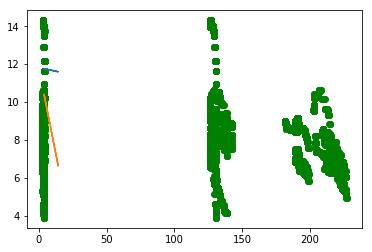

In [219]:
plt.plot(my_matrix, unemployment, 'go', unemployment, line_pred)
axes = plt.gca()
#axes.set_ylim([0, 32])
plt.show()

In [220]:
walmart_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [221]:
walmart_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Year,Month
0,1,1,2010-02-05,24924.50,False,2010,2
1,1,1,2010-02-12,46039.49,True,2010,2
2,1,1,2010-02-19,41595.55,False,2010,2
3,1,1,2010-02-26,19403.54,False,2010,2
4,1,1,2010-03-05,21827.90,False,2010,3


# Decision Tree Model

### CPI attribute is used for the decision tree model. Classification is made with respect to mean of CPI values.

In [222]:
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [223]:
from os.path import join
walmart_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Year,Month
0,1,1,2010-02-05,24924.50,False,2010,2
1,1,1,2010-02-12,46039.49,True,2010,2
2,1,1,2010-02-19,41595.55,False,2010,2
3,1,1,2010-02-26,19403.54,False,2010,2
4,1,1,2010-03-05,21827.90,False,2010,3


In [224]:
#Mapping discrete values to continuous values
walmart_features['IsHoliday'] =  walmart_features['IsHoliday'].map({True : 1, False : 0})

In [225]:
walmart_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,1
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,0
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,0
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,0


In [226]:
walmart_train['IsHoliday'] = walmart_train['IsHoliday'].map({True : 1, False : 0})

In [227]:
walmart_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Year,Month
0,1,1,2010-02-05,24924.50,0,2010,2
1,1,1,2010-02-12,46039.49,1,2010,2
2,1,1,2010-02-19,41595.55,0,2010,2
3,1,1,2010-02-26,19403.54,0,2010,2
4,1,1,2010-03-05,21827.90,0,2010,3


In [228]:
walmart_features['Date'] = pd.to_datetime(walmart_features['Date'])
walmart_features['Year'], walmart_features['Month'] = walmart_features['Date'].dt.year, walmart_features['Date'].dt.month
walmart_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Year,Month
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,2010,2
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,1,2010,2
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,0,2010,2
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,0,2010,2
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,0,2010,3


In [229]:
walmart_features = walmart_features.drop('Date',axis = 1)
walmart_features = walmart_features.drop('Month',axis = 1)
walmart_features = walmart_features.drop('MarkDown1',axis = 1)
walmart_features = walmart_features.drop('MarkDown2',axis = 1)
walmart_features = walmart_features.drop('MarkDown3',axis = 1)
walmart_features = walmart_features.drop('MarkDown4',axis = 1)
walmart_features = walmart_features.drop('MarkDown5',axis = 1)
walmart_features = walmart_features.drop('Year',axis = 1)
walmart_features = walmart_features.drop('IsHoliday',axis = 1)
walmart_features.head()

,Store,Temperature,Fuel_Price,CPI,Unemployment
0,1,42.31,2.572,211.096358,8.106
1,1,38.51,2.548,211.242170,8.106
2,1,39.93,2.514,211.289143,8.106
3,1,46.63,2.561,211.319643,8.106
4,1,46.50,2.625,211.350143,8.106


In [230]:
walmart_features = walmart_features.rename(columns={"CPI": "cop"})
walmart_features['CPI'] = 15 # a new cpi column is added to walmart_features
mean = walmart_features['cop'].mean() # classification will be applied with respect to mean
#mapping is done with this loop indeed
walmart_features.head()

,Store,Temperature,Fuel_Price,cop,Unemployment,CPI
0,1,42.31,2.572,211.096358,8.106,15
1,1,38.51,2.548,211.242170,8.106,15
2,1,39.93,2.514,211.289143,8.106,15
3,1,46.63,2.561,211.319643,8.106,15
4,1,46.50,2.625,211.350143,8.106,15


In [231]:
#walmart_features['CPI'] = walmart_features['cop']
print(mean)

171.5783938487799


In [232]:
'''for i in range(walmart_features['CPI'].size) :
    if walmart_features['cop'][i] < mean :
        walmart_features['CPI'][i] = 0
    else :
        walmart_features['CPI'][i] = 1'''

In [278]:
walmart_features.head()

,Store,Fuel_Price,CPI,Unemployment,Temperature
0,1,2.572,211.096358,8.106,0
1,1,2.548,211.242170,8.106,0
2,1,2.514,211.289143,8.106,0
3,1,2.561,211.319643,8.106,0
4,1,2.625,211.350143,8.106,0


In [286]:
cop_mean = walmart_features["CPI"].mean()
walmart_features["cpi_mod"] = 0
walmart_features.loc[walmart_features["CPI"] >= cop_mean, "cpi_mod"] = 1

In [288]:
walmart_features["cpi_mod"].value_counts()

1    3289
0    3146
Name: cpi_mod, dtype: int64

In [289]:
#So, what am i interested is guessing the consumer prıce ındex 
#X = walmart_features.drop('cpi_mod',axis = 1) # these are our features

y = walmart_features['cpi_mod'] # this is what we want to predict.

In [296]:
X = walmart_features.drop('CPI',axis =1)
X = X.drop('cpi_mod',axis = 1) # these are our features
X.head()

,Store,Fuel_Price,Unemployment,Temperature
0,1,2.572,8.106,10
1,1,2.548,8.106,10
2,1,2.514,8.106,10
3,1,2.561,8.106,10
4,1,2.625,8.106,10


In [243]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: CPI, dtype: int64

In [297]:
from sklearn.model_selection import train_test_split

In [298]:
# This will create us train and test datasets from the original dataset that we have where
# 70% of original dataframe will be train set and 30% of it will be test set to evaluate the Decision Tree
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.30)

In [299]:
from sklearn import tree
model = tree.DecisionTreeClassifier()


In [307]:
X.head()

,Store,Fuel_Price,Unemployment,Temperature
0,1,2.572,8.106,10
1,1,2.548,8.106,10
2,1,2.514,8.106,10
3,1,2.561,8.106,10
4,1,2.625,8.106,10


In [300]:

#i will map nan values for markdowns which actually menas nothing ? -> bunu sor 
#just drop the date object

walmart_features.size
model.fit(X_train, y_train) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [301]:
y_predict = model.predict(X_test)

In [306]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

1.0

It's obvious that our model predicted the CPI values with %100 accuracy

In [303]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

array([[958,   0],
       [  0, 973]])

In [304]:
pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted below mean', 'Predicted above mean'],
    index=['True below mean', 'True above mean'])

,Predicted below mean,Predicted above mean
True below mean,958,0
True above mean,0,973


# Random forest algorithm

In [244]:
walmart_features = walmart_features.drop('CPI',axis = 1)
walmart_features = walmart_features.rename(index=str, columns={"cop": "CPI"})
walmart_features.head()

,Store,Temperature,Fuel_Price,CPI,Unemployment
0,1,42.31,2.572,211.096358,8.106
1,1,38.51,2.548,211.242170,8.106
2,1,39.93,2.514,211.289143,8.106
3,1,46.63,2.561,211.319643,8.106
4,1,46.50,2.625,211.350143,8.106


Temperature is our target label, but currently it seems to have letter codes as labels. Let's check it below and map those labels correctly before proceeding.

In [163]:
walmart_features.head()

,Store,Temperature,Fuel_Price,CPI,Unemployment
0,1,42.31,2.572,211.096358,8.106
1,1,38.51,2.548,211.242170,8.106
2,1,39.93,2.514,211.289143,8.106
3,1,46.63,2.561,211.319643,8.106
4,1,46.50,2.625,211.350143,8.106


In [258]:
# Mapping target label to 0 and 1s
temp_mean = walmart_features['Temperature'].mean()
walmart_features['COP'] = 15
for i in range(walmart_features['Temperature'].size) :
    if walmart_features['Temperature'][i] < temp_mean :
        walmart_features['COP'][i] = 0
    else :
        walmart_features['COP'][i] = 1
        
    

In [260]:
walmart_features = walmart_features.drop('Temperature',axis = 1)
walmart_features = walmart_features.rename(index=str, columns={"COP": "Temperature"})


In [261]:
walmart_features.head()

,Store,Fuel_Price,CPI,Unemployment,Temperature
0,1,2.572,211.096358,8.106,0
1,1,2.548,211.242170,8.106,0
2,1,2.514,211.289143,8.106,0
3,1,2.561,211.319643,8.106,0
4,1,2.625,211.350143,8.106,0


In [262]:
# Creating training and test splits from the original dataframe
from sklearn.model_selection import train_test_split

#walmart_features = walmart_features.drop('Weekly_Sales',axis = 1)
A = walmart_features.iloc[:, walmart_features.columns != 'Temperature']
b = walmart_features.iloc[:, walmart_features.columns == 'Temperature']

# 75% for training and 25% for testing
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size= 0.25, random_state = 42)

In [265]:
from sklearn.ensemble import RandomForestClassifier
rf  = RandomForestClassifier(random_state = 42)

In [266]:
walmart_features.head()

,Store,Fuel_Price,CPI,Unemployment,Temperature
0,1,2.572,211.096358,8.106,0
1,1,2.548,211.242170,8.106,0
2,1,2.514,211.289143,8.106,0
3,1,2.561,211.319643,8.106,0
4,1,2.625,211.350143,8.106,0


In [267]:
rf.fit(A_train, b_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [272]:
b_train["Temperature"].value_counts()

1    2567
0    2259
Name: Temperature, dtype: int64

In [273]:
b_test["Temperature"].value_counts()

1    868
0    741
Name: Temperature, dtype: int64

In [268]:
pred_rf = rf.predict(A_test)

In [269]:
# Checking the performance of the model with accuracy score;
from sklearn import metrics

print("Accuracy of the random forest model: ",metrics.accuracy_score(b_test, pred_rf))

Accuracy of the random forest model:  0.9210689869484152


Our model uses many decision trees to work properly and it works very well

In [274]:
# It seems our model has a function called feature_importances_
# Let's call it and see what it does
rf.feature_importances_

array([0.07348599, 0.30663925, 0.43827941, 0.18159536])

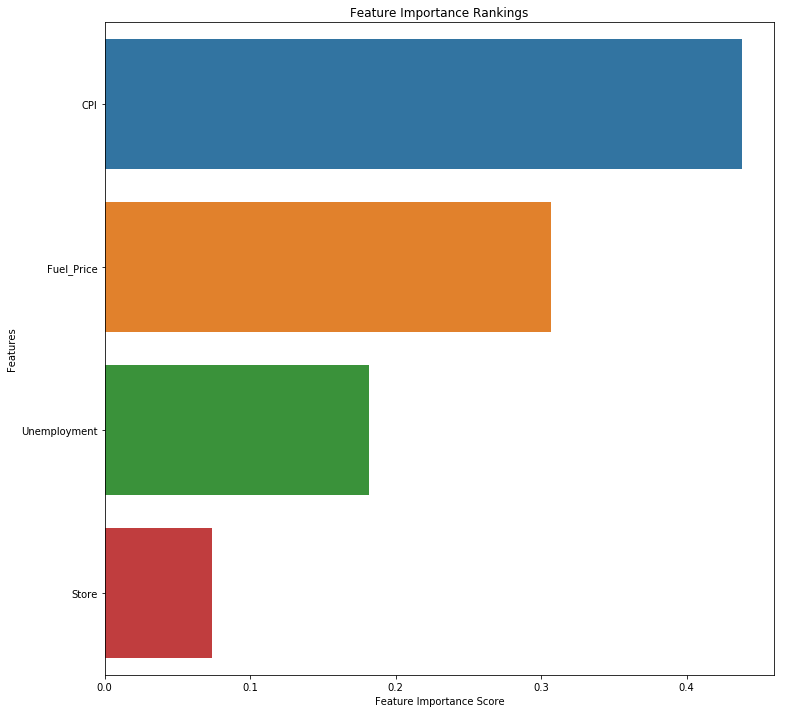

In [277]:
# Creating a bar plot for feature importances

# Firstly creating a Pandas Series to match feature importances values and their indices, also sorting them in decreasing order
feature_importances = pd.Series(rf.feature_importances_, index=A.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 12))
sns.barplot(x=feature_importances, y=feature_importances.index)

# Add labels to our graph  
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Feature Importance Rankings")
plt.show()